# Term Project

## Data Selection and EDA

### Reading the cookie training data

In [1]:
# importing libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# reading the data
file_path = 'C:/Users/ivan2/gitLocal/DSC630-SPRING2024/Cookies Results_2024-04-16 00_21_38.347_All_Domains (1).xlsx'


df_ck = pd.read_excel(file_path)
df_ck.head(5)

,Cookie Name,Cookie ID,Source,Lifespan,Hostname,Category,CategoryID,C_Source,Description,Domain Category Overrides,Domains
0,__utma,344997f4-0167-4bf9-9734-00189fe97218,SCAN,PERSISTENT,thinkgreenfromhome.com,Performance/Analytics Cookies,3,Google Analytics,Used to distinguish users and sessions. The c...,0,1
1,MYLTID,d0e47286-a459-46f5-9783-0071ea3c8963,SCAN,PERSISTENT,www.wmlamptracker.com,Essential Cookies,1,Lamptracker,LampTracker Application - Registered user acco...,0,1
2,NID,e8ede2a5-fa91-4241-a5d7-016f8e61b1c1,SCAN,PERSISTENT,translate-pa.googleapis.com,Targeting Cookies,4,Google Ads,"Security, Analytics, Functionality, Advertising",0,2
3,OptanonAlertBoxClosed,018df5f5-a8b0-755e-bdee-022ff8e7c817,MANUAL,PERSISTENT,.store.wm.com,Essential Cookies,1,OneTrust,This cookie is set by the cookie compliance s...,0,1
4,pxrc,3b0dbcb7-8b6d-46ea-9172-02d06a0a4071,SCAN,PERSISTENT,pippio.com,Targeting Cookies,4,Liveramp,Used to analyse how user interacts with the s...,0,0


In [3]:
df_ck.shape

(188, 11)

In [4]:
df_ck['CategoryID'] = df_ck['CategoryID'].astype('category')
df_ck['Category'] = df_ck['Category'].astype('category')
print(df_ck.dtypes)

Cookie Name                    object
Cookie ID                      object
Source                         object
Lifespan                       object
Hostname                       object
Category                     category
CategoryID                   category
C_Source                       object
Description                    object
Domain Category Overrides       int64
Domains                         int64
dtype: object


### Conducting initial EDA into the cookie training data

**1. Plotting the counts of the cookie category variable**

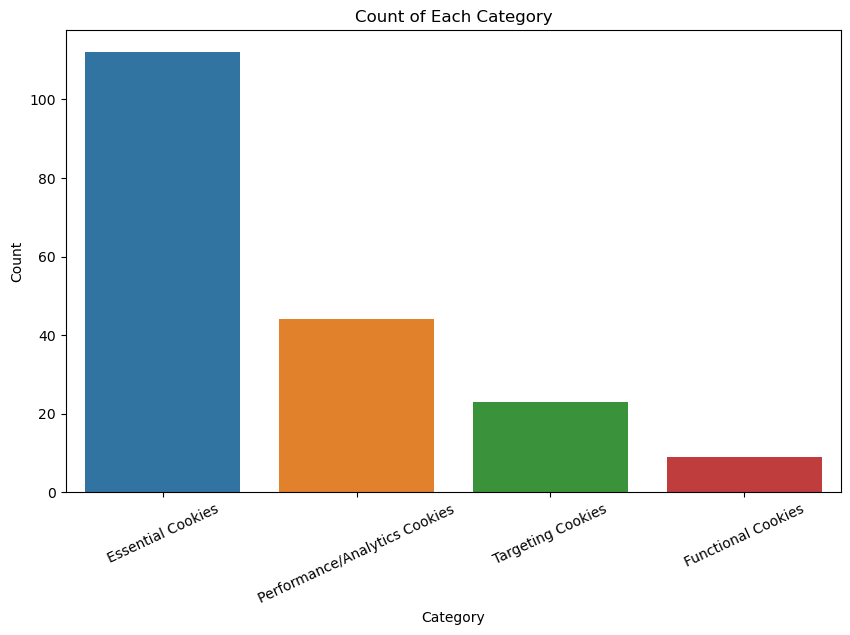

In [5]:
# calculate counts and sort categories by count
category_order = df_ck['Category'].value_counts().index

# create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Category', data=df_ck, order=category_order)
plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=25)  # rotating labels
plt.show()

**2. Displaying a few cookie descriptions and assigned categories**

In [6]:
def show_descriptions(df_ck, n = 1, RANDOM_STATE = 44):
    temp_df = df_ck.sample(n, random_state = RANDOM_STATE)
    indices = temp_df.index.tolist()
    for i in indices:
        print()
        print("Description:\n")
        print(f"Category: {temp_df.loc[i, 'Category']} \n")
        print(temp_df.loc[i, 'Description'])
        print()
        print('==' * 10)

In [7]:
show_descriptions(df_ck, 2)


Description:

Category: Performance/Analytics Cookies 

  This represents a series of cookies which monitor site performance to ensure appropriate load management. 


Description:

Category: Performance/Analytics Cookies 

 Used to distinguish users for web analytics purposes



**3. Plotting distribution of description length**

In [8]:
# establishing a copy of the dataframe
dfV2 = df_ck.copy()

In [9]:
# counting the length of each description
dfV2['desc_len'] = dfV2['Description'].map(len)
# check
dfV2[['Description', 'desc_len']].head()

,Description,desc_len
0,Used to distinguish users and sessions. The c...,205
1,LampTracker Application - Registered user acco...,52
2,"Security, Analytics, Functionality, Advertising",49
3,This cookie is set by the cookie compliance s...,533
4,Used to analyse how user interacts with the s...,105


In [10]:
# function for plotting distribution
def plot_distribution(df, colname, title, bin_size=None):
    sns.displot(data = dfV2, x = colname, bins=bin_size)
    plt.xlabel(title)
    plt.ylabel("Frequency")
    plt.title("Distribution of {}".format(title))
    plt.show();

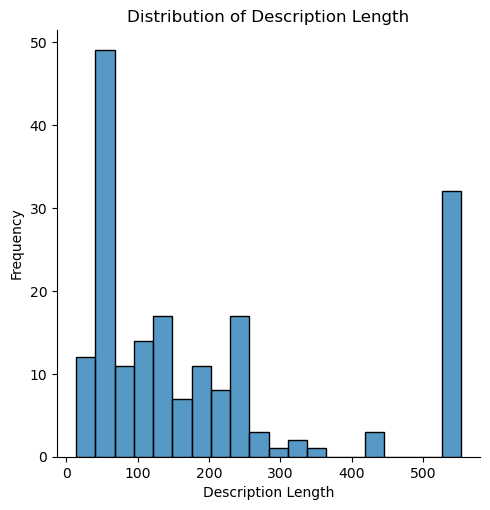

In [11]:
plot_distribution(dfV2, 'desc_len', 'Description Length', bin_size=20)

The distribution is unimodal. Most of the descriptions are relatively short, with a few much longer descriptions. The data does not follow a normal distribution and is skewed to the right. This is normal for text data since most entries will be concise.

**4. Plotting distribution of description length per category**

In [12]:
def show_dist_per_cat(df, colname, title):
    sns.boxplot(data = dfV2, y = colname, x = 'Category')
    plt.ylabel("Length")
    plt.xlabel("Category")
    plt.title(f"{title} Distribution per Sentiment")
    plt.xticks(rotation=25)  # rotating labels
    plt.show()
    
    print()
    print(dfV2.groupby(['Category'])[colname].describe())

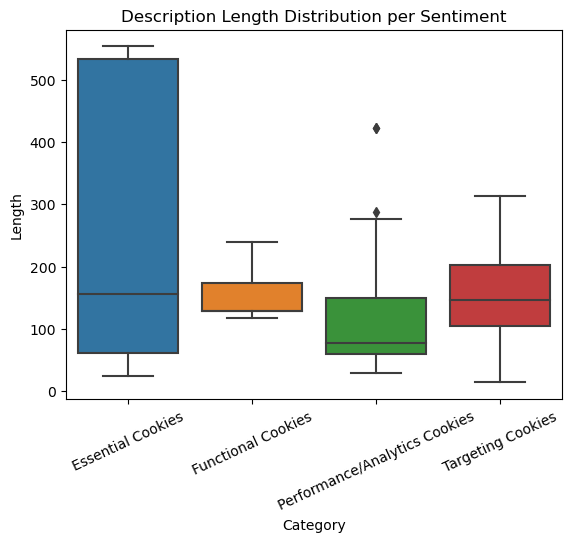


                               count        mean         std    min    25%  \
Category                                                                     
Essential Cookies              112.0  242.008929  199.756360   24.0   61.0   
Functional Cookies               9.0  152.111111   41.416918  117.0  128.0   
Performance/Analytics Cookies   44.0  119.522727   93.632008   29.0   60.0   
Targeting Cookies               23.0  148.739130   84.089896   14.0  105.0   

                                 50%     75%    max  
Category                                             
Essential Cookies              156.0  533.00  553.0  
Functional Cookies             128.0  173.00  240.0  
Performance/Analytics Cookies   78.0  150.25  423.0  
Targeting Cookies              146.0  203.00  313.0  


In [13]:
show_dist_per_cat(dfV2, 'desc_len', "Description Length")

**5. Plotting the counts of the cookie source variable**

In [14]:
# sorting the value counts
sorted_source_counts = dfV2['C_Source'].value_counts().sort_values(ascending=False)

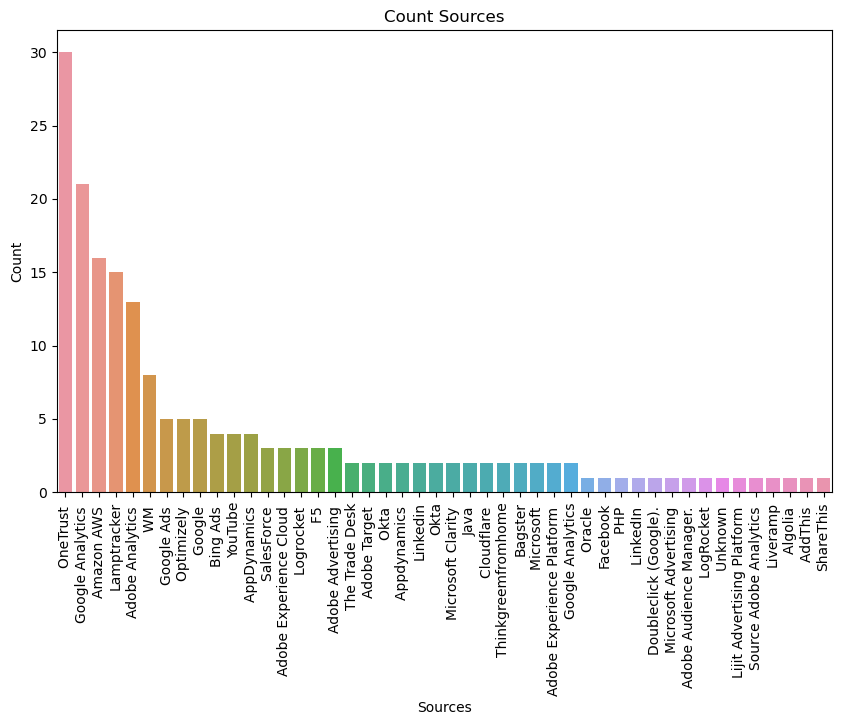

In [15]:
# plotting the counts of the 'Source' column
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='C_Source', data=dfV2, order=sorted_source_counts.index)
plt.title('Count Sources')
plt.xlabel('Sources')
plt.ylabel('Count')

# rotate x-axis labels to vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

**EDA Summary**

In short, the training data consists of a high volume of Essential Cookies and a low volume of Targeting and Functional Cookies. I will have to be careful when splitting the data into training and test sets to ensure that the low-volume cookies are adequately represented in each set.

The distribution of description length is right skewed but bimodal. Right skewed distributions  can be normal for text-based data, however I did not expect to see a large distribution of high description length cookies. 

Essential cookies have the highest average description length at 242 with a high std.dev, which explains the bimodal distribution since Essential cookies make up the majority of cookies. The remaining cookie categories average about an 140 description length. 

The sources with the highest cookie counts are from our secutiy platfrom OneTrust and our web analytics platforms. This is expected since those are first-party cookies. Ultimately, the exploratory data analysis gives me a good understanding of the data and leads me down a path for my next steps.

## Data Preparation

### Data Preperation / Processing

**Dropping Features**

I'll be dropping columns that do not add any predictive value to the model. The features that will be dropped contain contextual data to the nature of how the datapoints were acquired. This data is not relevant for our purposes since it is cookie agnostic and does not affect cookie description or classification.

I am also dropping identifiers since they do not add any predictive value.

In [16]:
# checking the current data frame
df_ck.head(5)

,Cookie Name,Cookie ID,Source,Lifespan,Hostname,Category,CategoryID,C_Source,Description,Domain Category Overrides,Domains
0,__utma,344997f4-0167-4bf9-9734-00189fe97218,SCAN,PERSISTENT,thinkgreenfromhome.com,Performance/Analytics Cookies,3,Google Analytics,Used to distinguish users and sessions. The c...,0,1
1,MYLTID,d0e47286-a459-46f5-9783-0071ea3c8963,SCAN,PERSISTENT,www.wmlamptracker.com,Essential Cookies,1,Lamptracker,LampTracker Application - Registered user acco...,0,1
2,NID,e8ede2a5-fa91-4241-a5d7-016f8e61b1c1,SCAN,PERSISTENT,translate-pa.googleapis.com,Targeting Cookies,4,Google Ads,"Security, Analytics, Functionality, Advertising",0,2
3,OptanonAlertBoxClosed,018df5f5-a8b0-755e-bdee-022ff8e7c817,MANUAL,PERSISTENT,.store.wm.com,Essential Cookies,1,OneTrust,This cookie is set by the cookie compliance s...,0,1
4,pxrc,3b0dbcb7-8b6d-46ea-9172-02d06a0a4071,SCAN,PERSISTENT,pippio.com,Targeting Cookies,4,Liveramp,Used to analyse how user interacts with the s...,0,0


In [17]:
# dropping variables with no predictive value
df_cookieV1 = df_ck.drop(['Cookie Name', 'Cookie ID', 'Source', 'Lifespan', 'Hostname', 
                          'Category', 'Domain Category Overrides', 'Domains'], axis=1)


In [18]:
# checking the column list
for col in df_cookieV1:
    print(col)

CategoryID
C_Source
Description


**Create Dummy Variables**

I plan to use one other categorical feature that I feel might improve the logistic regression. This categorical columns will need to be encoded. I will use one-hot encoding for since it is a non-ordinal categorical feature.

In [19]:
df_cookieV1.head(5)

,CategoryID,C_Source,Description
0,3,Google Analytics,Used to distinguish users and sessions. The c...
1,1,Lamptracker,LampTracker Application - Registered user acco...
2,4,Google Ads,"Security, Analytics, Functionality, Advertising"
3,1,OneTrust,This cookie is set by the cookie compliance s...
4,4,Liveramp,Used to analyse how user interacts with the s...


In [20]:
# convert 'C_Source' into dummy variables
source_dummies = pd.get_dummies(df_cookieV1['C_Source'])

# join the dummy variables to new df
df_cookieV2 = df_cookieV1.join(source_dummies)

In [21]:
# dropping the 'source' column
df_cookieV2 = df_cookieV2.drop(['C_Source'], axis=1)

In [22]:
# checking the column list
for col in df_cookieV2:
    print(col)

CategoryID
Description
AddThis 
Adobe Advertising 
Adobe Analytics 
Adobe Audience Manager. 
Adobe Experience Cloud 
Adobe Experience Platform 
Adobe Target 
Algolia 
Amazon AWS 
AppDynamics 
Appdynamics 
Bagster
Bing Ads 
Cloudflare 
Doubleclick (Google). 
F5 
Facebook
Google 
Google Ads 
Google Analytics
Google Analytics 
Java 
Lamptracker
Lijit Advertising Platform 
LinkedIn 
Linkedin
Liveramp
LogRocket 
Logrocket 
Microsoft 
Microsoft Advertising 
Microsoft Clarity 
Okta
Okta 
OneTrust 
Optimizely 
Oracle 
PHP 
SalesForce 
ShareThis
Source Adobe Analytics 
The Trade Desk
Thinkgreemfromhome
Unknown 
WM 
YouTube


In [23]:
df_cookieV2.head(3)

,CategoryID,Description,AddThis,Adobe Advertising,Adobe Analytics,Adobe Audience Manager.,Adobe Experience Cloud,Adobe Experience Platform,Adobe Target,Algolia,...,Oracle,PHP,SalesForce,ShareThis,Source Adobe Analytics,The Trade Desk,Thinkgreemfromhome,Unknown,WM,YouTube
0,3,Used to distinguish users and sessions. The c...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,LampTracker Application - Registered user acco...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,"Security, Analytics, Functionality, Advertising",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Process Unstructured Text Data**

Now that the dataset is cleaned and processed, the final step is to process the unstructured text data in the 'Concat' column. In order to build a NLP OvR Logistic Regression model, I need to process the text data in the following steps:

1. Remove HTML
2. Convert all text to lower case
3. Remove punctuations and special characters
4. Remove stop words
5. Apply stemmer


In [24]:
# creating a new df for consistency
df_cookieV3 = df_cookieV2

***1**. Removing HTML tags*

This is optional, but it doesn't hurt to do this just in case.

In [25]:
# Import BeautifulSoup to remove HTML tags
from bs4 import BeautifulSoup

# Define a function to apply BeautifulSoup and get text
def remove_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Appling the BeautifulSoup function directly to the concat column
df_cookieV3['Description'] = df_cookieV3['Description'].apply(remove_html)

C:\Users\ivan2\AppData\Local\Temp\ipykernel_4696\1868631959.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


In [26]:
print(df_cookieV3['Description'][3])

 This cookie is set by the cookie compliance solution from OneTrust. It stores information about the categories of cookies the site uses and whether visitors have given or withdrawn consent for the use of each category. This enables site owners to prevent cookies in each category from being set in the users browser, when consent is not given. The cookie has a normal lifespan of one year, so that returning visitors to the site will have their preferences remembered. It contains no information that can identify the site visitor. 


***2**. Convert all text to lower case*

In [27]:
# Convert all text to lower case in the data frame
df_cookieV3['Description'] = df_cookieV3['Description'].str.lower()

In [28]:
print(df_cookieV3['Description'][3])

 this cookie is set by the cookie compliance solution from onetrust. it stores information about the categories of cookies the site uses and whether visitors have given or withdrawn consent for the use of each category. this enables site owners to prevent cookies in each category from being set in the users browser, when consent is not given. the cookie has a normal lifespan of one year, so that returning visitors to the site will have their preferences remembered. it contains no information that can identify the site visitor. 


***3.** Remove punctuations and special characters*

In [29]:
import re

# Replace punctuations and special characters with an empty string
# The regular expression '[^\w\s]' matches any character that is not a word character (alphanumeric) or whitespace
df_cookieV3['Description'] = df_cookieV3['Description'].str.replace('[^\w\s]', '', regex=True)

In [30]:
print(df_cookieV3['Description'][3])

 this cookie is set by the cookie compliance solution from onetrust it stores information about the categories of cookies the site uses and whether visitors have given or withdrawn consent for the use of each category this enables site owners to prevent cookies in each category from being set in the users browser when consent is not given the cookie has a normal lifespan of one year so that returning visitors to the site will have their preferences remembered it contains no information that can identify the site visitor 


***4.** Remove stop words*

In [31]:
# Import the stop word list
from nltk.corpus import stopwords 
print(stopwords.words("english")) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [32]:
from nltk.tokenize import word_tokenize

# Load the list of English stop words
stop_words = set(stopwords.words('english'))

# Define a function to remove stop words from a text
def remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [w for w in tokens if not w.lower() in stop_words]
    # Join the tokens back into a string
    return ' '.join(filtered_tokens)

# Apply the function to the review column
df_cookieV3['Description'] = df_cookieV3['Description'].apply(remove_stopwords)

In [33]:
print(df_cookieV3['Description'][3])

cookie set cookie compliance solution onetrust stores information categories cookies site uses whether visitors given withdrawn consent use category enables site owners prevent cookies category set users browser consent given cookie normal lifespan one year returning visitors site preferences remembered contains information identify site visitor


***5.** Apply stemmer*

In [34]:
from nltk.stem import PorterStemmer

# Create an instance of the PorterStemmer
stemmer = PorterStemmer()

# Define a function to stem each word in the text
def stem_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Stem each word
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # Join the stemmed words back into a string
    return ' '.join(stemmed_tokens)

# Apply the function to the review column
df_cookieV3['Description'] = df_cookieV3['Description'].apply(stem_text)

In [35]:
print(df_cookieV3['Description'][3])

cooki set cooki complianc solut onetrust store inform categori cooki site use whether visitor given withdrawn consent use categori enabl site owner prevent cooki categori set user browser consent given cooki normal lifespan one year return visitor site prefer rememb contain inform identifi site visitor


In [36]:
df_cookieV3.head(3)

,CategoryID,Description,AddThis,Adobe Advertising,Adobe Analytics,Adobe Audience Manager.,Adobe Experience Cloud,Adobe Experience Platform,Adobe Target,Algolia,...,Oracle,PHP,SalesForce,ShareThis,Source Adobe Analytics,The Trade Desk,Thinkgreemfromhome,Unknown,WM,YouTube
0,3,use distinguish user session cooki creat javas...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,lamptrack applic regist user account id,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,secur analyt function advertis,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The dataset is now processed and ready for modeling. To recap, I removed features that did not add any predictive value, created dummy variables of a predictive categorial feature, and lastly processed unstructured text data for modeling.

This dataset can now be split into training and test sets to begin the modeling phase.

# Modeling Phase

### Initial Steps

**Split into Training and Test Sets**

Given the imbalance in the dataset, specifically with a high volume of 'CategoryID' 1 values and low volume of 'CategoryID' 3 values, it's important to ensure that each category is adequately represented in both the training and test sets. 

To achieve this I will use stratified sampling. This will ensure that the dat is divided in a way tha the proportion of each category is maintained in both training and test sets.

In [37]:
from sklearn.model_selection import train_test_split

# df_cookieV3 is the cleaned and processed df and 'CategoryID' is the target variable

# droping target feature
X = df_cookieV3.drop(['CategoryID'], axis=1)
y = df_cookieV3['CategoryID']

# spliting the data using stratified sampling to maintain category proportions
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# separating 'description' feature for TF-IDF vectorization
X_train_concat = X_train_raw['Description']
X_test_concat = X_test_raw['Description']

# droping 'description' column from the raw training and test sets AFTER its been separated
X_train_raw = X_train_raw.drop(['Description'], axis=1)
X_test_raw = X_test_raw.drop(['Description'], axis=1)

**Feature Enginering and Text Vectorization**

Fit and apply the tf-idf vectorization to the training set. Apply but not fit the tf-idf vectorization to the test set

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# apply tfidf only to the description feature of the training and test sets
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # added max feature to reduce computational load

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_concat)
X_test_tfidf = tfidf_vectorizer.transform(X_test_concat)

**Concatenate in One-Hot Encoded Featrues**

Adding one-hot encoded features to the tf-idf features. The one-hot encoded features add predictive value to the model so we want to include these.

In [39]:
import scipy.sparse as sp

# Concatenate the one-hot encoded features with the TF-IDF features
X_train_final = sp.hstack((X_train_raw.values, X_train_tfidf), format='csr')
X_test_final = sp.hstack((X_test_raw.values, X_test_tfidf), format='csr')

### Train and Evaluate a Random Forest Classifier Model

I chose a Random Forest Classifier Model because it has the capability to do multi-variant classification. Since our target variable is not binary, this is a good model to evaluate against.

*Model Training*

In [40]:
from sklearn.ensemble import RandomForestClassifier

# initializing the model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # adjustable model parameters

# training the model
model.fit(X_train_final, y_train)

RandomForestClassifier(random_state=42)

*Model Evaluation*

In [41]:
from sklearn.metrics import accuracy_score, classification_report

# make predictions on the test set
y_pred = model.predict(X_test_final)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# more comprehensive classification report
print(classification_report(y_test, y_pred))

Model Accuracy: 0.8421052631578947
              precision    recall  f1-score   support

           1       0.81      1.00      0.89        34
           2       1.00      0.33      0.50         3
           3       0.91      0.77      0.83        13
           4       1.00      0.43      0.60         7

    accuracy                           0.84        57
   macro avg       0.93      0.63      0.71        57
weighted avg       0.87      0.84      0.82        57



In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 1', 'Class 2', 'Class 3', 'Class 4'])
    disp.plot(cmap='Blues', colorbar=False)
    plt.title(title)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()

Random Forest Classifier Confusion Matrix:


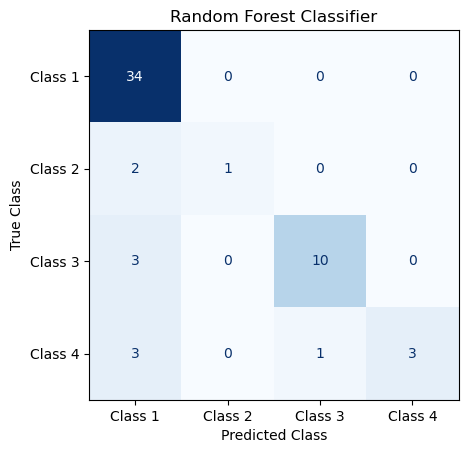

In [49]:
# RandomForestClassifier Confusion Matrix
print("Random Forest Classifier Confusion Matrix:")
plot_confusion_matrix(y_test, model.predict(X_test_final), title='Random Forest Classifier')

### Train and Evalaute a Logistic Rregrssion Classification OvR Model

When I started this project I expetected to use a Logistic Reg Classification model, but later realized that a binary model would not work for our target variable. After doing more research I found that an OvR model could handle milti-variant classifications and I wanted to use this method to train and evalaute a logistic reg classification model since it is a common and simple model to implement.

*Model Training*

In [42]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with the OvR strategy
logreg_ovr = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)

# Train the model
logreg_ovr.fit(X_train_final, y_train)

LogisticRegression(multi_class='ovr', random_state=42, solver='liblinear')

*Model Evaluation*

In [43]:
# Make predictions on the test set
y_pred = logreg_ovr.predict(X_test_final)

# Print the classification report to evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        34
           2       1.00      0.33      0.50         3
           3       0.92      0.85      0.88        13
           4       1.00      0.43      0.60         7

    accuracy                           0.86        57
   macro avg       0.94      0.65      0.72        57
weighted avg       0.88      0.86      0.84        57



Logistic Regression Confusion Matrix:


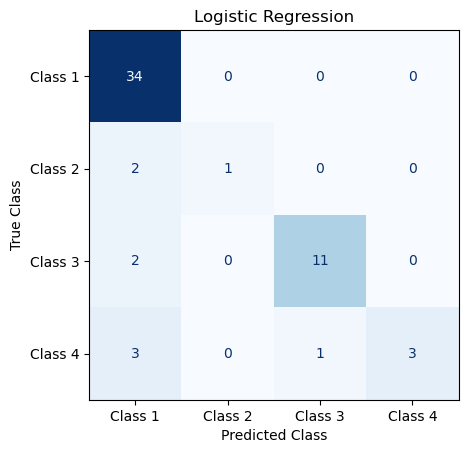

In [50]:
# LogisticRegression Confusion Matrix
print("Logistic Regression Confusion Matrix:")
plot_confusion_matrix(y_test, logreg_ovr.predict(X_test_final), title='Logistic Regression')

### Train and Evalaute a Multinomial Naive Bayes Model

Lastly I decided to include a Multinomial Naive Bayes Model because it is commonly known to be fast and effective for text classification tasks, especially when combined with TF-IDF features. Additonally a multinomial model can handle multi-variant classifications and the default hyper parameters tend to work well as is.

As an added plus, Naive Bayes models are computationally efficinet and require less training data. This is particularly useful for me since my un-split training data only has a few records.

*Model Training*

In [44]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_final, y_train)

MultinomialNB()

*Model Evaluation*

In [45]:
# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_final)

# Print the classification report to evaluate the model
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       0.85      1.00      0.92        34
           2       1.00      0.33      0.50         3
           3       0.85      0.85      0.85        13
           4       1.00      0.43      0.60         7

    accuracy                           0.86        57
   macro avg       0.92      0.65      0.72        57
weighted avg       0.88      0.86      0.84        57



Naive Bayes Classifier Confusion Matrix:


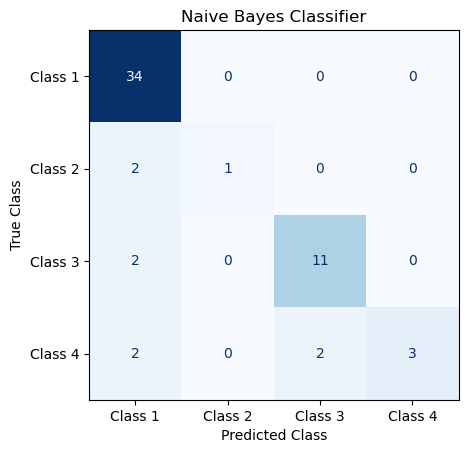

In [51]:
# MultinomialNB Confusion Matrix
print("Naive Bayes Classifier Confusion Matrix:")
plot_confusion_matrix(y_test, nb_model.predict(X_test_final), title='Naive Bayes Classifier')